<a href="https://colab.research.google.com/github/playapez/ProyectoFinal/blob/main/Actividad_C1_P1_Jose_Angel_Regino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convocatoria 1 - Proyecto 1

#### 0) Cargar una de las imágenes histológicas

In [ ]:
import skimage
from skimage import io
import numpy as np
from skimage import img_as_float
from skimage import io, color, img_as_ubyte, filters, morphology, feature, measure
import matplotlib.pyplot as plt



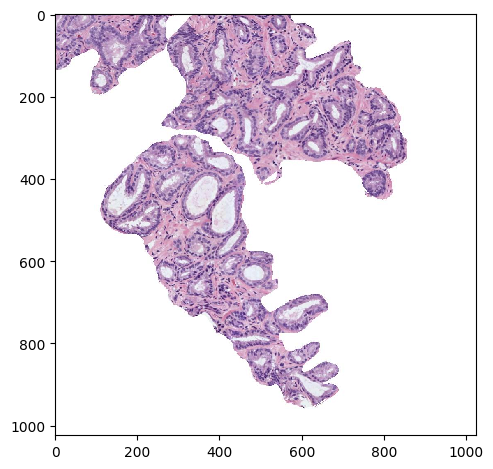

In [ ]:
# Utilizar la librería skimage.io para leer la imagen 'histo_x.jpg' en formato RGB.
img1 = io.imread("histo_2.jpg")
# Normalizar la imagen para que los píxeles se encuentren en el rango [0, 1]
image_float1 = img_as_float(img1)
image1 = (image_float1 - image_float1.min()) / (image_float1.max() - image_float1.min())
# Visualizar la imagen
io.imshow(image1)
io.show()

#### 1) Realizar una transformación de color para convertir la imagen al espacio de color CMYK

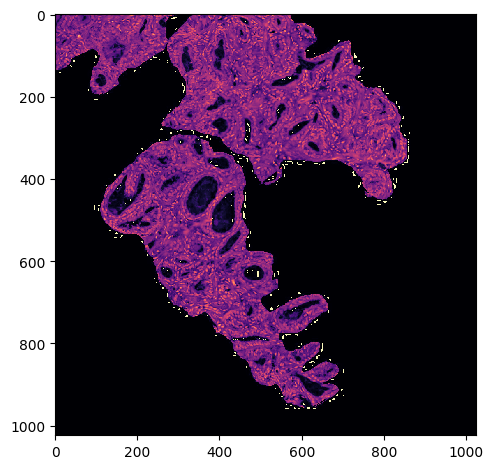

In [ ]:
# Extraer la componente magenta de la imagen (que corresponde a la región tisular)
# Extraer los canales de color (rojo, verde, azul)
red_channel = img1[:, :, 0]
green_channel = img1[:, :, 1]
blue_channel = img1[:, :, 2]
# Calcular la componente magenta (aproximación)
magenta_component = red_channel - green_channel - blue_channel
# Visualizar la imagen del canal magenta
io.imshow(magenta_component, cmap='magma')
io.show()

#### 2) Umbralizar la imagen para separar los píxeles del fondo de la región tisular

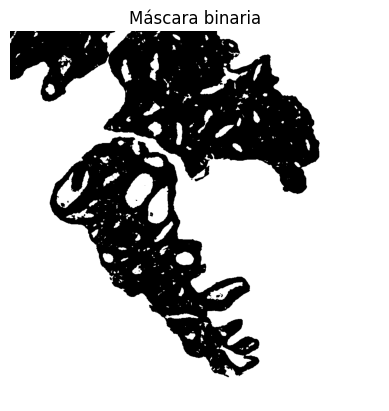

In [ ]:
# Aplicar un filtro gaussiano de tamaño 5x5 y después utilizar el método de Otsu de manera que
# los píxeles correspondientes al lumen y al background de la imagen sean 1s y el resto de los píxeles tengan un valor de 0.
# Nota: Recordar que el método de Otsu requiere como input una imagen en el rango [0-255] en formato "uint8".
# Visualizar la máscara resultante


# Cargar la imagen en escala de grises
img = io.imread("histo_2.jpg", as_gray=True)

# Aplicar filtro gaussiano de tamaño 5x5
img_gaussian = filters.gaussian(img, sigma=1)

# Convertir la imagen filtrada a uint8
img_gaussian = img_as_ubyte(img_gaussian)

# Obtener el umbral óptimo utilizando el método Otsu
thresh_value = filters.threshold_otsu(img_gaussian)

# Aplicar umbralización binaria
binary_image1 = img_gaussian > thresh_value

# Visualizar máscara binaria
plt.imshow(binary_image1, cmap="gray")
plt.title('Máscara binaria')
plt.axis('off')
plt.show()

#### 3) Limpiar la imagen eliminando los artefactos de lumen (objetos blancos pequeños que no son lúmenes)

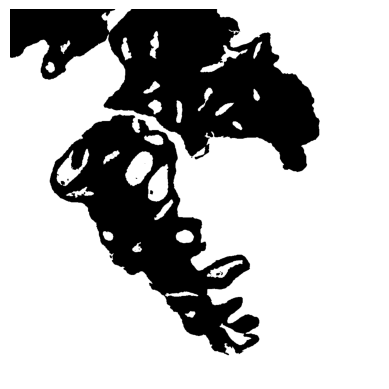

In [ ]:
# Utilizar la librería skimage.morphology.remove_small_objects para eliminar aquellos objetos cuya área sea menor a 300 píxeles
# Más información en https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.remove_small_objects
# Visualizaer la máscara resultante


# Eliminar objetos pequeños con área menor a 300 píxeles
cleaned_image1 = morphology.remove_small_objects(binary_image1, min_size=300)

# Mostrar la máscara binaria resultante
plt.imshow(cleaned_image1, cmap="gray")
plt.axis('off')
plt.show()

#### 4) Rellenar con 0s el fondo de la imagen para quedarnos únicamente con los lúmenes

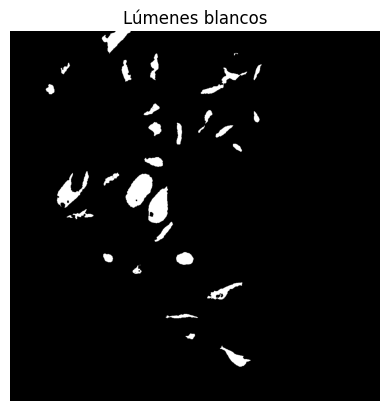

In [ ]:
# Aplicar el algoritmo de expansión a partir de semillas (region growing) de manera que únicamente los lúmenes sean blancos
# y el resto de la imagen negra. Pista: utilizar dos semillas. Nota: Se pueden fijar las semillas de manera manual, pero
# se valorará positivamente a aquell@s que desarrollen una función para encontrarlas automáticamente.
# Visualizar la máscara resultante.

import numpy as np
import cv2
import skimage.io
from skimage import img_as_ubyte, measure
import matplotlib.pyplot as plt

# Cargar la imagen
img = cleaned_image1

# Convertir la imagen a uint8
img = img_as_ubyte(img)

# Aplicar filtrado para mejorar la calidad de la imagen
img_filtered = cv2.GaussianBlur(img, (5, 5), 0)

# Aplicar umbralización directamente a la imagen filtrada
_, thresholded = cv2.threshold(img_filtered, 200, 255, cv2.THRESH_BINARY)

# Etiquetar los componentes conectados en la imagen umbralizada
labeled_mask, num_features = measure.label(thresholded, connectivity=2, return_num=True)

# Definir un umbral de tamaño para identificar fondos grandes
tamaño_fondo_umbral = 20000

# Crear una nueva imagen donde los fondos grandes sean coloreados de negro
fondo_negro_mask = np.copy(labeled_mask)
for label in range(1, num_features + 1):
    if np.sum(labeled_mask == label) > tamaño_fondo_umbral:
        fondo_negro_mask[labeled_mask == label] = 0

# Convertir los colores grises en blanco
fondo_negro_mask[fondo_negro_mask > 0] = 255

# Mostrar la imagen
plt.imshow(fondo_negro_mask, cmap='gray')
plt.title('Lúmenes blancos')
plt.axis('off')
plt.show()


#### 5) Rellenar los objetos de los lúmenes

<ipython-input-9-4c14e6c42f43>:6: DeprecationWarning: Please use `binary_fill_holes` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  from scipy.ndimage.morphology import binary_fill_holes


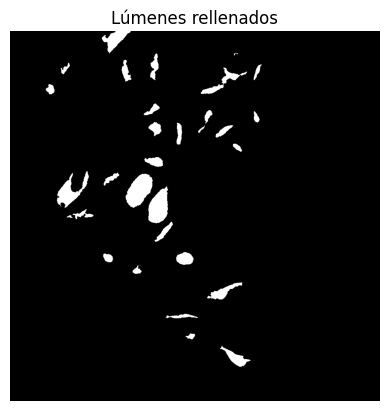

In [ ]:
import numpy as np
import cv2
import skimage.io
from skimage import img_as_ubyte, measure
import matplotlib.pyplot as plt
from scipy.ndimage.morphology import binary_fill_holes

# Cargar la imagen
img = cleaned_image1

# Convertir la imagen a uint8
img = img_as_ubyte(img)

# Aplicar filtrado para mejorar la calidad de la imagen
img_filtered = cv2.GaussianBlur(img, (5, 5), 0)

# Aplicar umbralización directamente a la imagen filtrada
_, thresholded = cv2.threshold(img_filtered, 200, 255, cv2.THRESH_BINARY)

# Etiquetar los componentes conectados en la imagen umbralizada
labeled_mask, num_features = measure.label(thresholded, connectivity=2, return_num=True)

# Definir un umbral de tamaño para identificar fondos grandes
tamaño_fondo_umbral = 20000

# Crear una nueva imagen donde los fondos grandes sean coloreados de negro
fondo_negro_mask = np.copy(labeled_mask)
for label in range(1, num_features + 1):
    if np.sum(labeled_mask == label) > tamaño_fondo_umbral:
        fondo_negro_mask[labeled_mask == label] = 0

# Convertir los colores grises en blanco
fondo_negro_mask[fondo_negro_mask > 0] = 255

# Rellenar los lúmenes usando la función binary_fill_holes
lumen_filled_mask = binary_fill_holes(fondo_negro_mask)

# Mostrar la imagen resultante
plt.imshow(lumen_filled_mask, cmap='gray')
plt.title('Lúmenes rellenados')
plt.axis('off')
plt.show()


#### 6) Detectar y dibujar los contornos de los lúmenes sobre la imagen original

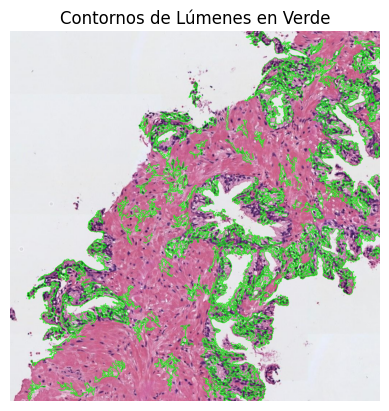

In [ ]:
# Dibujar los contornos de los lúmenes en color verde sobre la imagen original RGB. Nota: Utilizar los flags necesarios
# para que los contornos en verde sean perfectamente visibles.
# Visualizar la imagen superpuesta
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en color (rango 0 a 255)
image_path = 'histo_1.jpg'  # Reemplaza con la ruta correcta de tu imagen
image = cv2.imread(image_path)

# Convertir la imagen a escala de grises
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar detección de bordes usando Canny
edges = cv2.Canny(gray_image, threshold1=50, threshold2=150)

# Encontrar los contornos en la imagen de bordes
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filtrar contornos por área para omitir los más pequeños y grandes
min_contour_area = 125
max_contour_area = 20000
filtered_contours = [contour for contour in contours if min_contour_area <= cv2.contourArea(contour) <= max_contour_area]

# Dibujar los contornos en una copia de la imagen original
image_with_contours = image.copy()
cv2.drawContours(image_with_contours, filtered_contours, -1, (0, 255, 0), 1, cv2.LINE_AA)

# Convertir la imagen resultante de BGR a RGB
image_with_contours_rgb = cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB)

# Mostrar la imagen resultante con los contornos en verde
plt.imshow(image_with_contours_rgb)
plt.title('Contornos de Lúmenes en Verde')
plt.axis('off')
plt.show()

#### 7) Identificar y cropear el lumen más grande

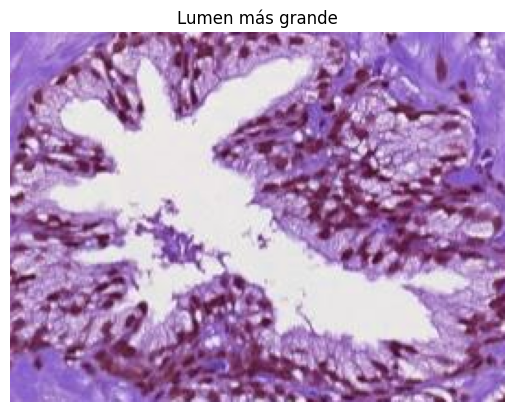

In [ ]:
# Determinar cuál es el lumen de mayor área y hacer un crop del mismo sobre la imagen original RGB.
# Visualizar el lumen cropeado.'
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para generar semillas automáticamente a partir de los bordes detectados
def automatic_seed_generation(image):
    edges = cv2.Canny(np.uint8(image * 255), threshold1=50, threshold2=150)

    lumens_coords = np.column_stack(np.where(edges > 0))

    return lumens_coords

# Cargar la imagen
image = cv2.imread('histo_1.jpg')

# Obtener la semilla automáticamente a partir de los bordes de los lúmenes
seed_coords = automatic_seed_generation(image)

# Crear una máscara en negro
lumen_mask = np.zeros_like(image, dtype=np.uint8)

# Marcar los puntos de semilla en la máscara
for coord in seed_coords:
    lumen_mask[coord[0], coord[1]] = 255

# Convertir la imagen a escala de grises
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar threshold adaptativo en la imagen en escala de grises
_, thresh_img = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Aplicar cierre morfológico para eliminar pequeños detalles
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closed_img = cv2.morphologyEx(thresh_img, cv2.MORPH_CLOSE, kernel)

# Etiquetar los componentes
num_features, labeled_mask = cv2.connectedComponents(closed_img)

# Definir un umbral de tamaño para identificar el lúmen
tamaño_lumen_umbral = 20000

# Crear una nueva máscara donde los lúmenes pequeños sean coloreados de blanco y los grandes de negro
lumen_mask_final = np.copy(closed_img)
for label in range(1, num_features):
    area = np.sum(labeled_mask == label)
    if area < tamaño_lumen_umbral:
        lumen_mask_final[labeled_mask == label] = 255
    else:
        lumen_mask_final[labeled_mask == label] = 0

# Encontrar los contornos en la máscara final de lúmenes
contours, _ = cv2.findContours(lumen_mask_final, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Encontrar el contorno con el área más grande
largest_contour = max(contours, key=cv2.contourArea)

# Obtener las coordenadas del rectángulo que enmarca el contorno más grande
x, y, w, h = cv2.boundingRect(largest_contour)

# Recortar el lumen de la imagen original
cropped_lumen = image[y:y+h, x:x+w]

# Mostrar el lumen recortado
plt.imshow(cropped_lumen, cmap='gray')
plt.title('Lumen más grande')
plt.axis('off')
plt.show()



#### 8) Extraer 13 características geométricas que permitan caracterizar el lumen recortado

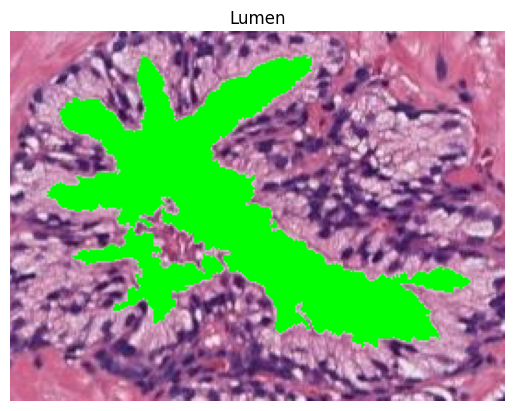

Area:  11339.0
Área de la bounding box:  54069
Área convexa:  26763.0
Exentricidad:  0.7573
Diámetro equivalente:  120.1552
Extensión:  1.5312
Diámetro Feret:  240.3081
Longitud del eje mayor:  207.3151
Longitud del eje menor:  135.3904
Orientación:  107.3525
Perímetro:  1588.185
Solidez:  0.4237
Compacidad:  17.7018


In [ ]:
# Calcular las siguientes características del crop del lumen de mayor área,
# 1) Área
# 2) Área de la bounding box
# 3) Área convexa
# 4) Exentricidad
# 5) Diámetro equivalente
# 6) Extensión
# 7) Diámetro Feret
# 8) Longitud del eje mayor
# 9) Longitud del eje menor
# 10) Orientación
# 11) Perímetro
# 12) Solidez
# 13) Compacidad

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en color
image = cropped_lumen
area_total = image.shape[0] * image.shape[1]

# Convertir la imagen a escala de grises
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Definir el umbral para detectar el lumen
threshold_value = 200

# Crear una máscara donde los píxeles blancos son 255 y los demás son 0
lumen_mask = np.where(gray_image > threshold_value, 255, 0).astype(np.uint8)

# Encontrar los contornos en la máscara
contours, _ = cv2.findContours(lumen_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Crear una máscara en blanco del mismo tamaño que la imagen original
mask = np.zeros_like(image)

# Dibujar el lumen con mayor área en la máscara
largest_contour = max(contours, key=cv2.contourArea)
cv2.drawContours(mask, [largest_contour], -1, (0, 255, 0), thickness=cv2.FILLED)

# Calcular el área del lumen en píxeles
area_lumen = cv2.contourArea(largest_contour)

# Calcular el área convexa del lumen
convex_hull_area = cv2.contourArea(cv2.convexHull(largest_contour))

# Calcular el área y la excentricidad del lumen
lumen_area = cv2.contourArea(largest_contour)
ellipse = cv2.fitEllipse(largest_contour)
major_axis = max(ellipse[1])
minor_axis = min(ellipse[1])
excentricity = np.sqrt(1 - (minor_axis ** 2) / (major_axis ** 2))
excentricity_round = round(excentricity, 4)

# Calcular el diámetro equivalente del lumen
lumen_area = cv2.contourArea(largest_contour)
equivalent_diameter = 2 * np.sqrt(lumen_area / np.pi)
equivalent_diameter_round = round(equivalent_diameter,4)

ellipse = cv2.fitEllipse(largest_contour)

# Calcular la extensión
major_axis = max(ellipse[1])
minor_axis = min(ellipse[1])
extension = major_axis / minor_axis
extension_round = round(extension,4)

# Calcular el diámetro de Feret
def feret_diameter(contour):
    max_distance = 0
    for point1 in contour:
        for point2 in contour:
            distance = np.linalg.norm(point1 - point2)
            if distance > max_distance:
                max_distance = distance
    return max_distance

# Calcular el diámetro de Feret del lumen
diameter_feret = feret_diameter(largest_contour)
diameter_feret_round = round(diameter_feret,4)

major_axis_round = round(major_axis,4)
minor_axis_round = round(minor_axis,4)

# Calcular la orientación de la elipse en grados
orientation = ellipse[2]
orientation_round = round(orientation,4)

# Calcular el perímetro del lumen
perimeter = cv2.arcLength(largest_contour, closed=True)
perimeter_round = round(perimeter,4)

# Calcular la solidez
solidez = area_lumen / convex_hull_area
solidez_round = round(solidez,4)

# Calcular la compacidad
compacidad = (perimeter ** 2) / (4 * np.pi * area_lumen)
compacidad_round = round(compacidad,4)

# Crear una máscara booleana para el lumen
lumen_mask = mask[:, :, 1] > 0

# Copiar el lumen de la imagen original a una nueva imagen y llenar con verde
result_image = np.copy(image)
result_image[lumen_mask] = [0, 255, 0]

# Mostrar la imagen resultante con el lumen rellenado de verde
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title('Lumen')
plt.axis('off')
plt.show()
print("Area: ",area_lumen)
print("Área de la bounding box: ",area_total)
print("Área convexa: ",convex_hull_area)
print("Exentricidad: ",excentricity_round)
print("Diámetro equivalente: ",equivalent_diameter_round)
print("Extensión: ",extension_round)
print("Diámetro Feret: ",diameter_feret_round)
print("Longitud del eje mayor: ",major_axis_round)
print("Longitud del eje menor: ",minor_axis_round)
print("Orientación: ",orientation_round)
print("Perímetro: ",perimeter_round)
print("Solidez: ",solidez_round)
print("Compacidad: ",compacidad_round)